In [1]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [4]:
# Import data portland_final.csv
df = pd.read_csv("mastercardwithnaics.csv")

In [5]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,zipcode,NAICS,totalEmp2017,ESTAB2017,bus_ratio,geoid,oth_ratio,res_ratio,...,CEstab2017,estabratio2017,Empratio2017,industry,txn_amt,txn_cnt,acct_cnt,avg_ticket,avg_freq,avg_spend_amt
0,0,893,97201,7223,160,16,0.314890,41051005600,0.231203,0.375224,...,5.038242,5.038242,50.382425,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,893,97201,7223,160,16,0.314890,41051005600,0.231203,0.375224,...,5.038242,5.038242,50.382425,eap,144.107265,334.421282,340.158205,3.710199,9.347507,3.694701
2,2,893,97201,7223,160,16,0.314890,41051005600,0.231203,0.375224,...,5.038242,5.038242,50.382425,eap,112.108205,267.243504,271.302222,2.217997,5.857007,2.218716
3,3,893,97201,7223,160,16,0.314890,41051005600,0.231203,0.375224,...,5.038242,5.038242,50.382425,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,902,97201,7225,1580,90,0.314890,41051005600,0.231203,0.375224,...,28.340114,28.340114,497.526444,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,902,97201,7225,1580,90,0.314890,41051005600,0.231203,0.375224,...,28.340114,28.340114,497.526444,eap,144.107265,334.421282,340.158205,3.710199,9.347507,3.694701
6,6,902,97201,7225,1580,90,0.314890,41051005600,0.231203,0.375224,...,28.340114,28.340114,497.526444,eap,112.108205,267.243504,271.302222,2.217997,5.857007,2.218716
7,7,902,97201,7225,1580,90,0.314890,41051005600,0.231203,0.375224,...,28.340114,28.340114,497.526444,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8,894,97201,7223,160,16,0.542718,41051005700,0.283835,0.264294,...,8.683483,8.683483,86.834825,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,894,97201,7223,160,16,0.542718,41051005700,0.283835,0.264294,...,8.683483,8.683483,86.834825,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df = df.drop(columns = ["Unnamed: 0"])

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(558, 20)

In [9]:
# Check all column names
df.columns

Index(['Unnamed: 0.1', 'zipcode', 'NAICS', 'totalEmp2017', 'ESTAB2017',
       'bus_ratio', 'geoid', 'oth_ratio', 'res_ratio', 'tot_ratio',
       'CEstab2017', 'estabratio2017', 'Empratio2017', 'industry', 'txn_amt',
       'txn_cnt', 'acct_cnt', 'avg_ticket', 'avg_freq', 'avg_spend_amt'],
      dtype='object')

# modeling

dependent variables(outputs):
1. Empratio : the size of employment  of all industries in corresponding us census tract and  year

2. estabratio: the size of establishment of all industries in corresponding us census tract and  year


use all the varaibles to predict establishment size 
12. bus_ratio: the ratio of bus usage by total public transportation

In [59]:
data = df[["zipcode", "geoid", "oth_ratio", "res_ratio", "tot_ratio", "bus_ratio", "NAICS",
           "txn_amt", "txn_cnt", "acct_cnt", "avg_ticket", "avg_freq", "avg_spend_amt", "industry",
           "Empratio2017", "estabratio2017"]]

In [19]:
data.head()

,zipcode,geoid,oth_ratio,res_ratio,tot_ratio,bus_ratio,NAICS,txn_amt,txn_cnt,acct_cnt,avg_ticket,avg_freq,avg_spend_amt,industry,Empratio2017,estabratio2017
0,97201,41051005600,0.231203,0.375224,0.364485,0.31489,7223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eap,50.382425,5.038242
1,97201,41051005600,0.231203,0.375224,0.364485,0.31489,7223,144.107265,334.421282,340.158205,3.710199,9.347507,3.694701,eap,50.382425,5.038242
2,97201,41051005600,0.231203,0.375224,0.364485,0.31489,7223,112.108205,267.243504,271.302222,2.217997,5.857007,2.218716,eap,50.382425,5.038242
4,97201,41051005600,0.231203,0.375224,0.364485,0.31489,7225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,eap,497.526444,28.340114
5,97201,41051005600,0.231203,0.375224,0.364485,0.31489,7225,144.107265,334.421282,340.158205,3.710199,9.347507,3.694701,eap,497.526444,28.340114


In [60]:
# Label our Empratio and estabratio
# Transfer continous data to 4 groups of categorical data by quartile
# emp_label: 0 < 59.451386 < 363.368506 < 1224.943938 < infinity
# est_label: 0 < 3.579339 < 20.674918 < 69.929409 < infinity

data["emp_label"] = pd.qcut(data["Empratio2017"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])
data["est_label"] = pd.qcut(data["estabratio2017"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Decision Tree

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Employment label

In [23]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "oth_ratio":"avg_spend_amt"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

In [24]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 18, 'max_leaf_nodes': 35}
0.7380952380952381


In [28]:
from sklearn import tree

# Use max_depth = 18 and max_leaf_nodes = 35 in this case
dt = DecisionTreeClassifier(max_depth = 18, max_leaf_nodes = 35)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

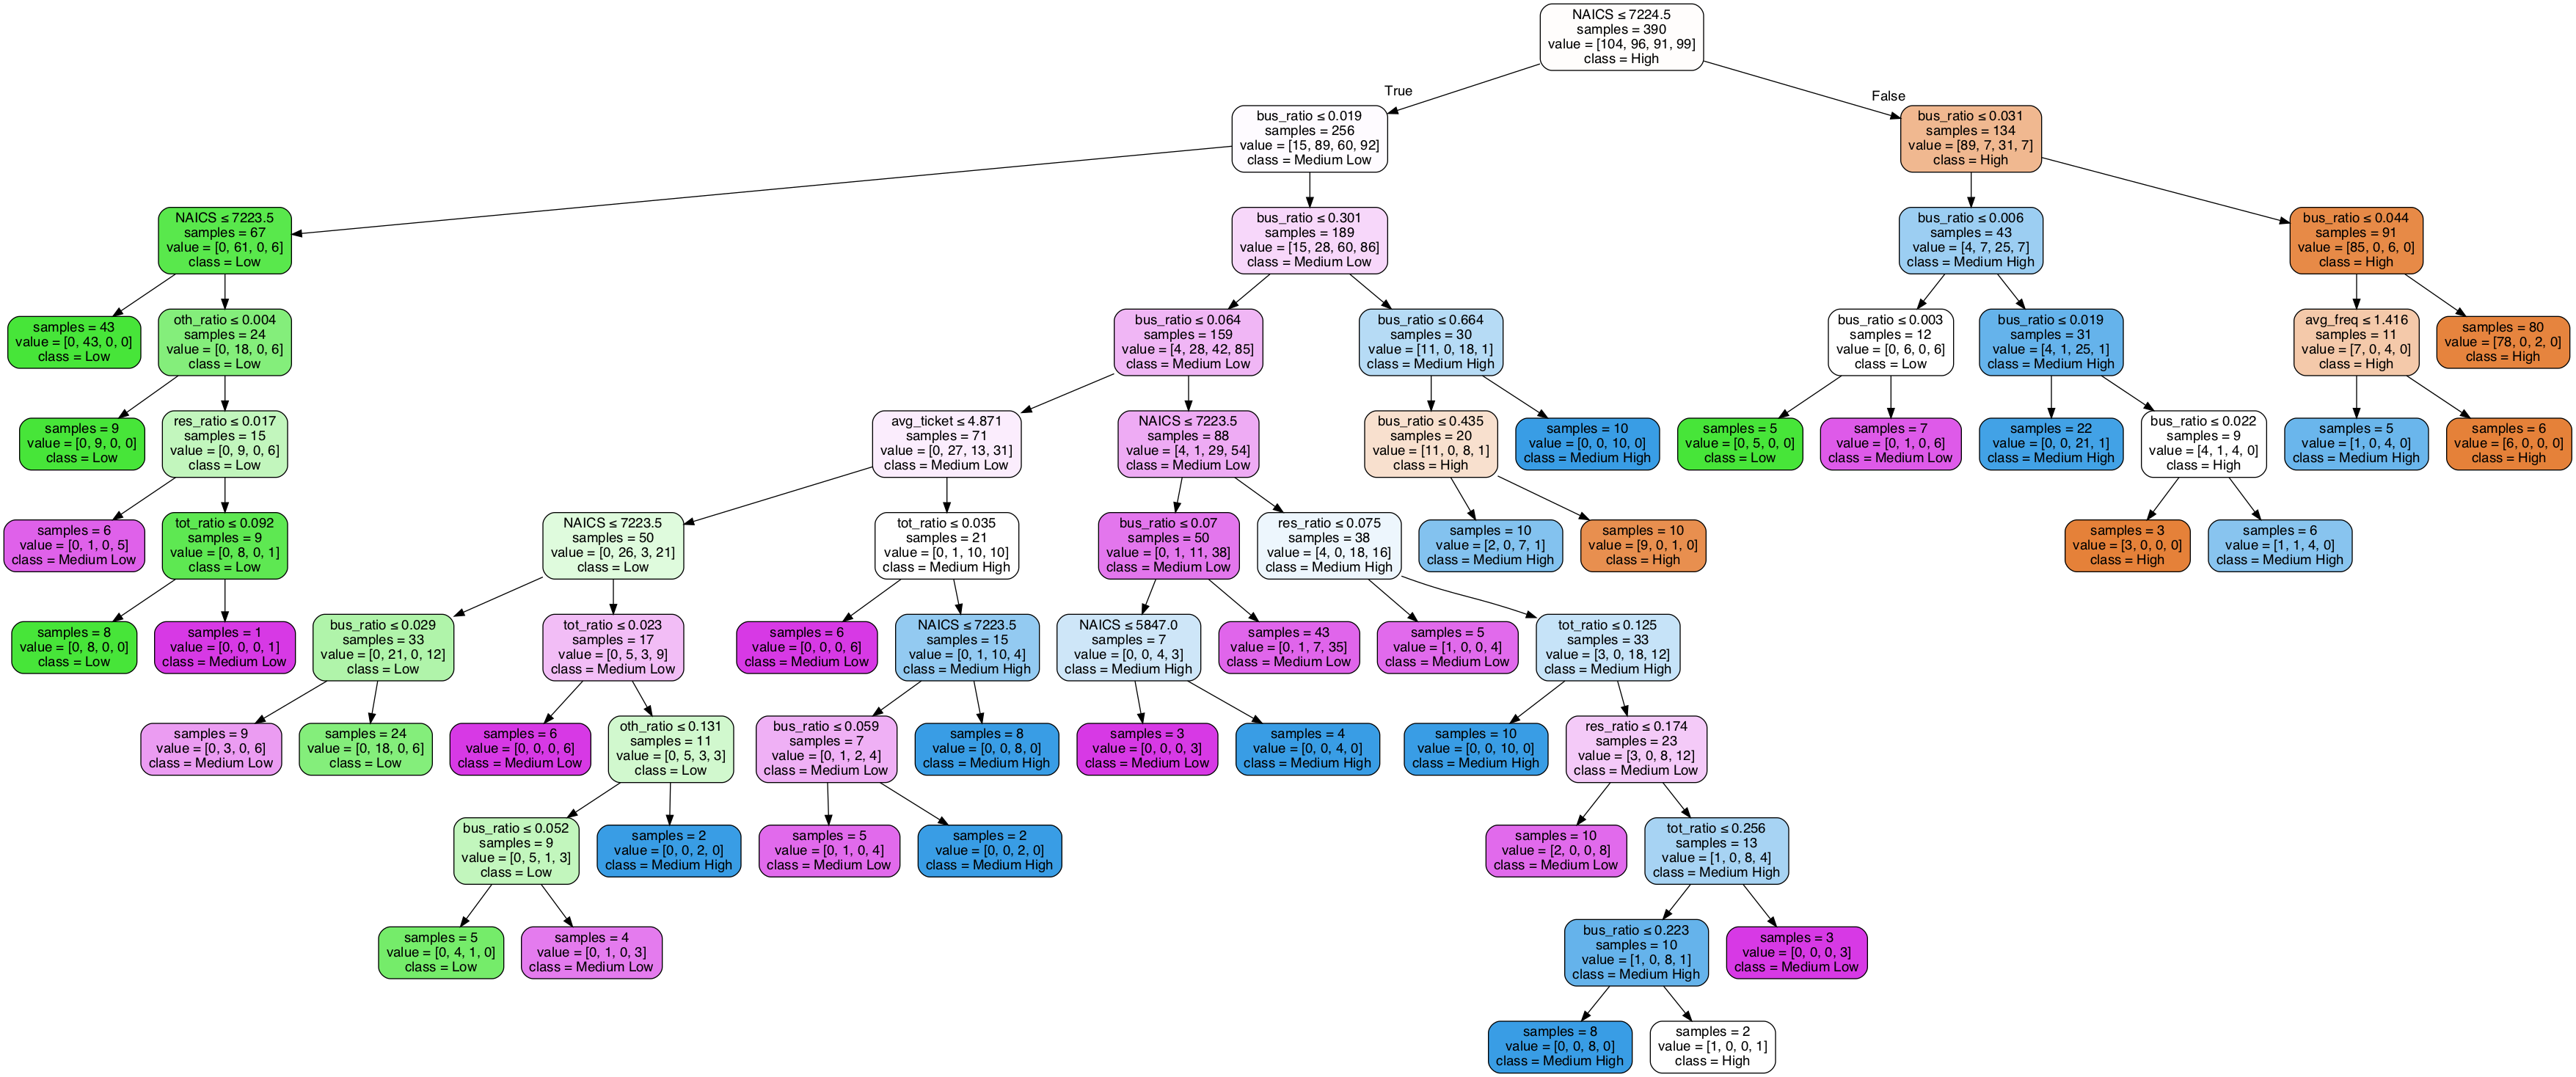

In [29]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [30]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
3,bus_ratio,0.561809
4,NAICS,0.267292
2,tot_ratio,0.0743952
1,res_ratio,0.0404785
8,avg_ticket,0.0251169


## Establishment label

In [31]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "oth_ratio":"avg_spend_amt"]
y_est = data.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [32]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 6, 'max_leaf_nodes': 43}
0.7976190476190477


In [33]:
# Use max_depth = 6 and max_leaf_nodes = 43 in this case
dt = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 43)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

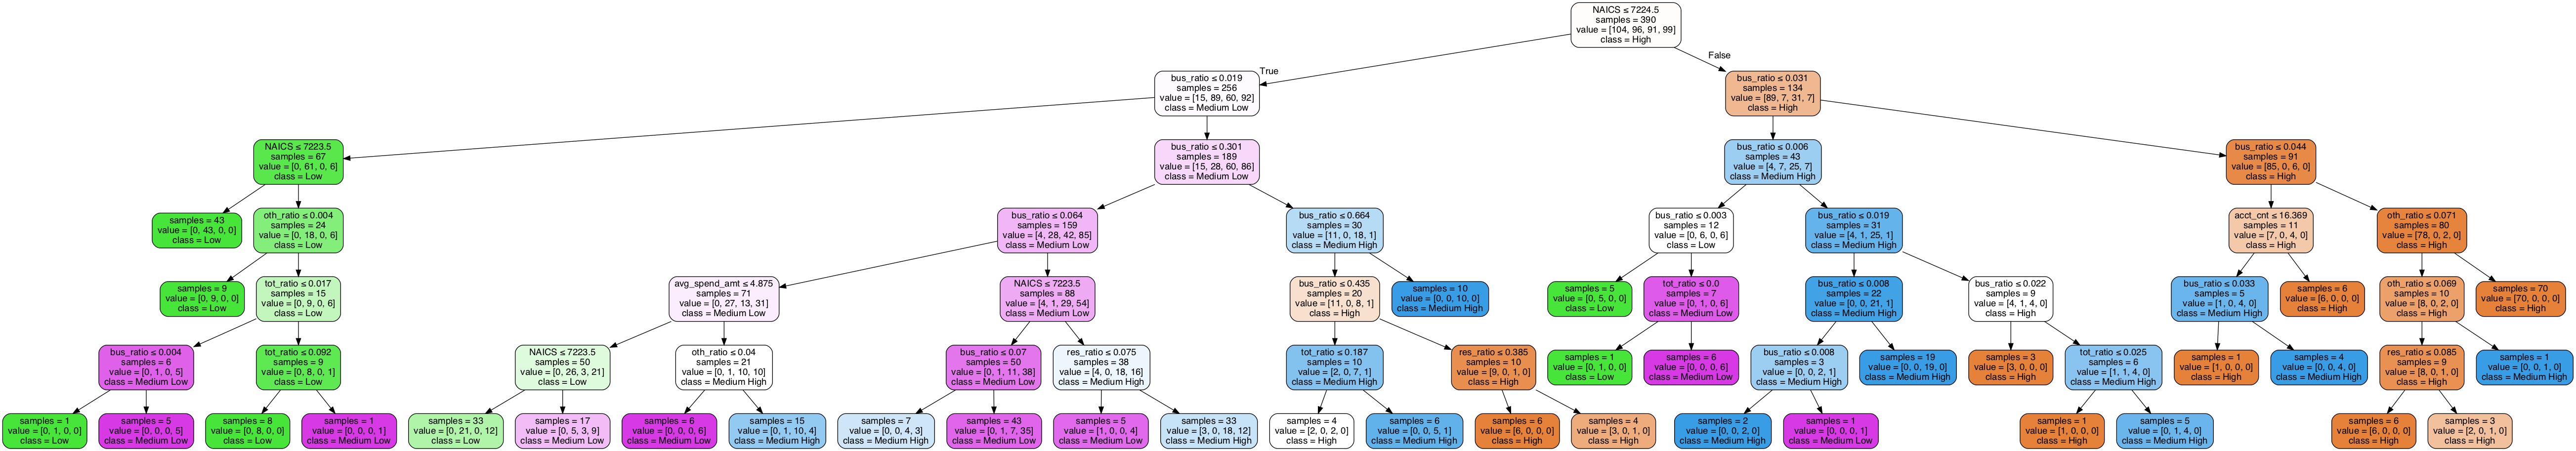

In [34]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [35]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
3,bus_ratio,0.597778
4,NAICS,0.262175
2,tot_ratio,0.0446579
0,oth_ratio,0.0379918
10,avg_spend_amt,0.0275394


# Random Forest

## Employment label

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random forest model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=35)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.6904761904761905


In [38]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
4,NAICS,0.327371
3,bus_ratio,0.221278
2,tot_ratio,0.10954
0,oth_ratio,0.101
1,res_ratio,0.095687


## Establishment label

In [39]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=43)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.7738095238095238


In [40]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
4,NAICS,0.277965
3,bus_ratio,0.244684
2,tot_ratio,0.125778
0,oth_ratio,0.120881
1,res_ratio,0.10184


# Industry as y

In [69]:
# Import data portland_final.csv
data = pd.read_csv("mastercard_industry.csv")

In [70]:
data.head()

,Unnamed: 0,geoid,industry,txn_amt,txn_cnt,acct_cnt,avg_ticket,avg_freq,avg_spend_amt
0,0,41051000100,aut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,41051000100,eap,232.217374,195.095556,200.231515,9.321758,8.971195,9.191242
2,2,41051000100,ret,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,41051000200,aut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,41051000200,eap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
data["industry"].value_counts()

ret    173
eap    166
aut     88
gro     57
app     36
acc     32
Name: industry, dtype: int64

In [72]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "txn_amt":"avg_spend_amt"]
y_industry = data.loc[ : , "industry"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_industry, y_test_industry = train_test_split(X, y_industry, test_size=0.3,random_state=2020)

In [73]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_industry)
print(rs.best_params_)
print(rs.score(X_test, y_test_industry))

{'max_depth': 9, 'max_leaf_nodes': 9}
0.39759036144578314


In [74]:
# Use max_depth = 2 and max_leaf_nodes = 3 in this case
dt = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 9)
dt.fit(X_train, y_train_industry)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

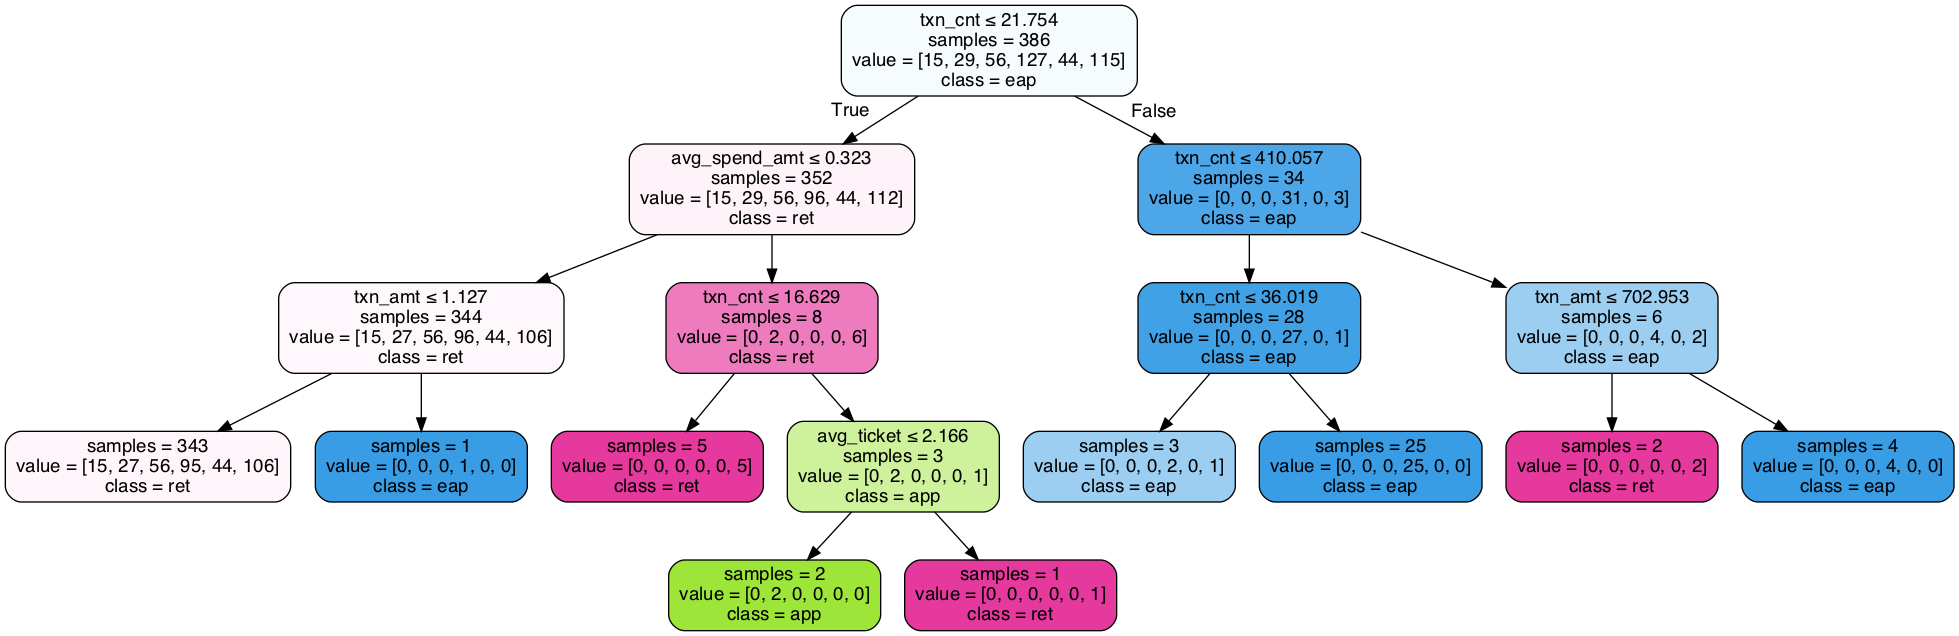

In [75]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

In [76]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
1,txn_cnt,0.719892
0,txn_amt,0.126502
5,avg_spend_amt,0.103018
3,avg_ticket,0.0505875
2,acct_cnt,0


In [77]:
# Random forest model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=9)
rf.fit(X_train, y_train_industry)
print (rf.score(X_test, y_test_industry))

0.39759036144578314


In [78]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
1,txn_cnt,0.249232
2,acct_cnt,0.208108
0,txn_amt,0.197157
3,avg_ticket,0.153518
5,avg_spend_amt,0.109535
